# Clasificación del conjunto de datos IRIS con Máquinas de Soporte Véctor.

**Debes entregar el resultado final de tu trabajo de la siguiente forma:**
* **Archivo .ipynb** con el cuaderno de Jupyter que contenga todas las instrucciones usadas.
* **Archivo .html** con el código y la salida obtenida en su ejecución (debes exportar en formato HTML).

**Es fundamental que comentes el código, para su correcta legibilidad, así como realizar interpretaciones de las salidas que se obtengan.**

## 1. Carga de los datos

En primer lugar, cargaremos el conjunto de datos IRIS dataset (Más información en https://archive.ics.uci.edu/ml/datasets/iris). Este se puede descargar de Internet o puede cargarse directamente de la librería `scikit-learn`, que incorpora un conjunto de datasets muy conocidos y empleados para minería de datos y machine learning.
* Carga de los datos
* Imprime los primeros 5 registros de datos
* Imprime en pantalla el nombre de las clases de la variable objetivo (nombres reales de las flores del conjunto Iris).

In [12]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el dataset de iris
iris = load_iris()

# Crear un DataFrame con los datos y las etiquetas
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# Mostrar los 5 primeros registros
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# Imprimir los nombres de las clases de la variable objetivo
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## 2. Preparación del conjunto de entrenamiento y test

* Genera los conjuntos de entrenamiento y test (20%).

In [14]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y etiquetas (y)
X = df_iris.drop(columns=['target'])  # Eliminar la columna 'target' para obtener solo las características
y = df_iris['target']  # Extraer la columna 'target' como etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos generados
# Esto ayuda a verificar que los datos se han dividido correctamente
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (120, 4) (120,)
Dimensiones del conjunto de prueba: (30, 4) (30,)


## 3. Creación y entrenamiento del modelo

* Crea y entrena un modelo basado en SVM.

In [15]:
from sklearn.svm import SVC

# Crear el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Mostrar un mensaje indicando que el modelo ha sido entrenado
print("El modelo SVM ha sido entrenado exitosamente.")

El modelo SVM ha sido entrenado exitosamente.


## 4. Validación del modelo

* Comprueba la precisión del modelo sobre el conjunto de datos de test.
* Crea la matriz de confusión asociada.

In [16]:
from sklearn.metrics import classification_report

# Generar las predicciones del modelo en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Mostrar el reporte
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Conclusión del reporte de clasificación

El modelo SVM entrenado ha demostrado un rendimiento excelente, alcanzando una precisión, recall y f1-score de 1 para todas las clases (setosa, versicolor y virginica). Esto indica que el modelo clasifica correctamente todas las instancias del conjunto de prueba sin errores. La precisión global del modelo es del 100%, lo que sugiere que el modelo está perfectamente ajustado para este conjunto de datos.

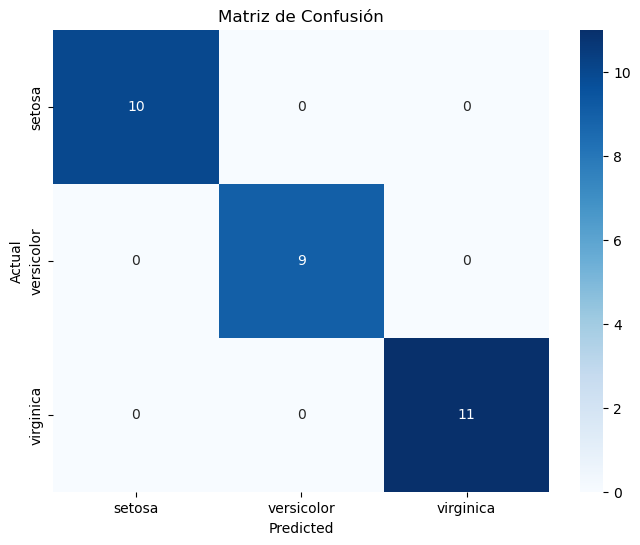

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Configurar el tamaño de la figura para la representación gráfica
plt.figure(figsize=(8, 6))

# Representar la matriz de confusión como un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)

# Etiquetas para los ejes
plt.xlabel('Predicted')  # Etiqueta para el eje X (Predicciones del modelo)
plt.ylabel('Actual')     # Etiqueta para el eje Y (Valores reales)

# Título del gráfico
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### Conclusión de la Matriz de Confusión

La matriz de confusión muestra que el modelo SVM clasifica correctamente el conjunto de prueba, sin errores de clasificación. Cada clase (setosa, versicolor y virginica) tiene valores únicamente en la diagonal principal, lo que indica una precisión perfecta en la predicción.

## 5. Representación gráfica

* Representa el modelo SVM que has desarrollado anteriormente, tomando sólo dos clases: versicolor y virgínica, y dos características: el largo y el ancho del pétalo.

In [18]:
import numpy as np

# Filtrar las clases versicolor (1) y virginica (2)
filtered_df = df_iris[df_iris['target'].isin([1, 2])]

# Seleccionar las características petal length (cm) y petal width (cm)
X_filtered = filtered_df[['petal length (cm)', 'petal width (cm)']]
y_filtered = filtered_df['target']

# Entrenar un nuevo modelo SVM con los datos filtrados
svm_model_filtered = SVC(kernel='linear', random_state=42)
svm_model_filtered.fit(X_filtered, y_filtered)

SVC(kernel='linear', random_state=42)

In [19]:
from sklearn.metrics import classification_report

# Generar las predicciones del modelo en el conjunto filtrado
y_pred_filtered = svm_model_filtered.predict(X_filtered)

# Generar el reporte de clasificación para el conjunto filtrado
report_filtered = classification_report(y_filtered, y_pred_filtered, target_names=iris.target_names[1:])

# Mostrar el reporte
print("Reporte de clasificación para el conjunto filtrado:")
print(report_filtered)

Reporte de clasificación para el conjunto filtrado:
              precision    recall  f1-score   support

  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



/home/alumnadotarde/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


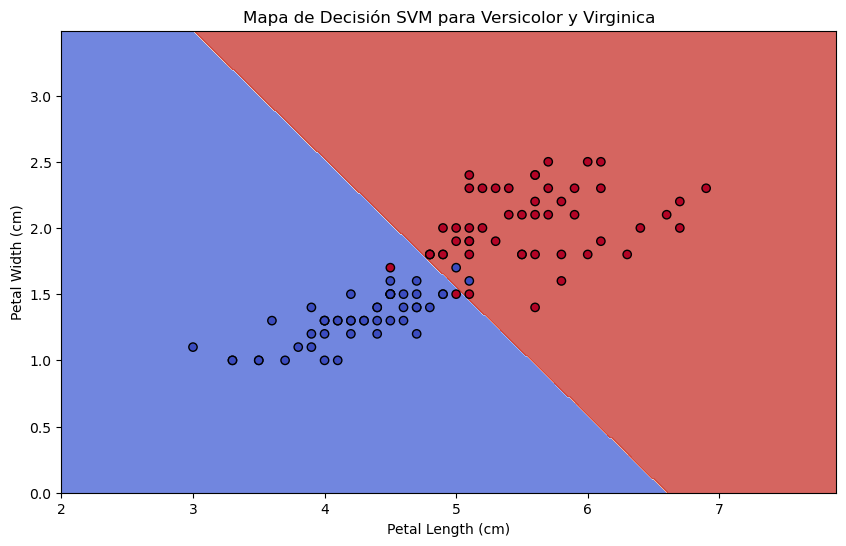

In [20]:
# Crear una malla para graficar las regiones de decisión
x_min, x_max = X_filtered.iloc[:, 0].min() - 1, X_filtered.iloc[:, 0].max() + 1
y_min, y_max = X_filtered.iloc[:, 1].min() - 1, X_filtered.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir las clases para cada punto de la malla
Z = svm_model_filtered.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar las regiones de decisión y los puntos de datos
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_filtered.iloc[:, 0], X_filtered.iloc[:, 1], c=y_filtered, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Mapa de Decisión SVM para Versicolor y Virginica')
plt.show()

## 6. Predicción de características
 
* Realiza, para la variedad versicolor, la predicción del modelo con los siguientes datos para los petalos: [4.25,1.27] y [5.75,2.5].

In [22]:
from sklearn.datasets import load_iris  # Importar el dataset Iris de scikit-learn
from sklearn.pipeline import make_pipeline  # Importar la función para crear pipelines
from sklearn.preprocessing import StandardScaler  # Importar el escalador estándar para normalizar los datos
from sklearn.svm import LinearSVC  # Importar el modelo SVM lineal

# Cargar el dataset Iris como un DataFrame
iris = load_iris(as_frame=True)

# Seleccionar las características 'petal length (cm)' y 'petal width (cm)' como matriz de entrada X
X = iris.data[["petal length (cm)", "petal width (cm)"]].values

# Crear el vector objetivo y, donde True indica la clase 'Iris virginica'
y = (iris.target == 2)  # Clase 'Iris virginica'

# Crear un pipeline que incluye la normalización de los datos y el modelo SVM lineal
svm_clf = make_pipeline(StandardScaler(),  # Normalizar las características
                         LinearSVC(C=1, random_state=42))  # Modelo SVM lineal con hiperparámetro C=1

# Entrenar el modelo con los datos de entrada X y las etiquetas y
svm_clf.fit(X, y)

# Nuevos datos para realizar predicciones
new_data = [[4.25, 1.27], [5.75, 2.5]]

# Realizar predicciones con el modelo entrenado
predictions = svm_clf.predict(new_data)

# Imprimir las predicciones para los nuevos datos
print("Predicciones para nuevos datos:", predictions)

Predicciones para nuevos datos: [False  True]


/home/alumnadotarde/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
